Membaca data

In [78]:
import pandas as pd

df = pd.read_csv('dataset1.csv')
df.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


Mengecek Informasi data

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       880 non-null    int64  
 1   P       880 non-null    float64
 2   K       880 non-null    int64  
 3   pH      880 non-null    float64
 4   EC      880 non-null    float64
 5   OC      880 non-null    float64
 6   S       880 non-null    float64
 7   Zn      880 non-null    float64
 8   Fe      880 non-null    float64
 9   Cu      880 non-null    float64
 10  Mn      880 non-null    float64
 11  B       880 non-null    float64
 12  Output  880 non-null    int64  
dtypes: float64(10), int64(3)
memory usage: 89.5 KB


In [80]:
df.describe()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
count,880.00000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,246.73750,14.562159,499.978409,7.510500,0.543659,0.617989,7.545080,0.469273,4.140523,0.952443,8.666500,0.590159,0.588636
std,77.38886,21.967755,124.222838,0.464912,0.141597,0.842986,4.424184,1.894234,3.110011,0.465900,4.298828,0.570800,0.575462
min,6.00000,2.900000,11.000000,0.900000,0.100000,0.100000,0.640000,0.070000,0.210000,0.090000,0.110000,0.060000,0.000000
25%,201.00000,6.800000,412.000000,7.350000,0.430000,0.380000,4.700000,0.280000,2.050000,0.630000,6.225000,0.270000,0.000000
50%,257.00000,8.100000,475.000000,7.500000,0.545000,0.590000,6.640000,0.360000,3.565000,0.930000,8.345000,0.405000,1.000000
75%,307.00000,10.550000,581.000000,7.630000,0.640000,0.780000,8.750000,0.470000,6.320000,1.250000,11.472500,0.610000,1.000000
max,383.00000,125.000000,887.000000,11.150000,0.950000,24.000000,31.000000,42.000000,44.000000,3.020000,31.000000,2.820000,2.000000


Melihat distribusi data Y (Target)

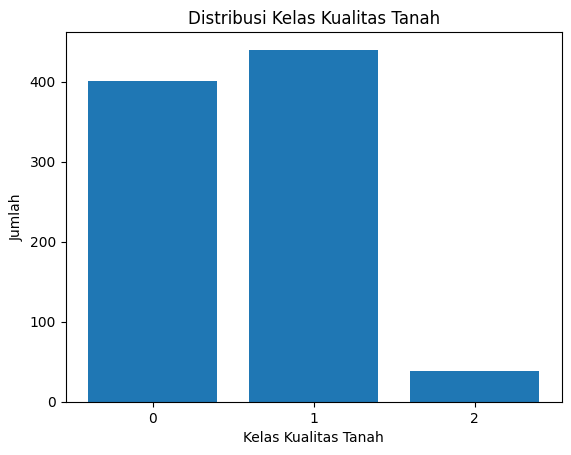

In [81]:
import matplotlib.pyplot as plt

kelas_counts = df['Output'].value_counts().sort_index()

plt.bar(kelas_counts.index, kelas_counts.values)
plt.xlabel('Kelas Kualitas Tanah')
plt.ylabel('Jumlah')
plt.title('Distribusi Kelas Kualitas Tanah')
plt.xticks([0, 1, 2])
plt.show()




Mengecek Missing Value

In [82]:
df.isnull().sum()

N         0
P         0
K         0
pH        0
EC        0
OC        0
S         0
Zn        0
Fe        0
Cu        0
Mn        0
B         0
Output    0
dtype: int64

Mengecek Outlier menggunakan IQR

In [83]:
simpan_outlier = []

for kolom in df.columns:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    print(f"{kolom} : {outliers.shape[0]} outlier")

N : 13 outlier
P : 77 outlier
K : 8 outlier
pH : 40 outlier
EC : 1 outlier
OC : 1 outlier
S : 43 outlier
Zn : 8 outlier
Fe : 2 outlier
Cu : 1 outlier
Mn : 7 outlier
B : 119 outlier
Output : 0 outlier


Imputasi Outlier menggunakan Median

In [84]:
import numpy as np

kolom_pilihan = ["pH", "S", "B"]

for kolom in kolom_pilihan:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[kolom].median()
    df[kolom] = np.where((df[kolom] < lower_bound) | (df[kolom] > upper_bound), median, df[kolom])

Imputasi Outlier menggunakan Mean

In [85]:
kolom_pilihan = ["P"]

for kolom in kolom_pilihan:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mean = df[kolom].mean()
    df[kolom] = np.where((df[kolom] < lower_bound) | (df[kolom] > upper_bound), mean, df[kolom])

Cek Outlier setelah imputasi

In [86]:
print("\nJumlah Outlier per Kolom (setelah imputasi):")
for kolom in df.columns:
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[kolom] < lower_bound) | (df[kolom] > upper_bound)]
    print(f"- {kolom}: {outliers.shape[0]} outlier")


Jumlah Outlier per Kolom (setelah imputasi):
- N: 13 outlier
- P: 0 outlier
- K: 8 outlier
- pH: 5 outlier
- EC: 1 outlier
- OC: 1 outlier
- S: 8 outlier
- Zn: 8 outlier
- Fe: 2 outlier
- Cu: 1 outlier
- Mn: 7 outlier
- B: 15 outlier
- Output: 0 outlier


Pisahkan kolom antara X dan Y

In [21]:
features = ['N', 'P', 'K', 'pH', 'EC', 'OC', 'S', 'Zn', 'Fe', 'Cu', 'Mn', 'B']
X = df[features]
y = df['Output']

SMOTE 

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print("Jumlah data setelah SMOTE:")
print("X:", X_resampled.shape)
print("y:", y_resampled.shape)   

Jumlah data setelah SMOTE:
X: (1320, 12)
y: (1320,)


Normalisasi

In [23]:
from sklearn.preprocessing import StandardScaler

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

print("\nhasil normalisasi data latih:")
print(X_scaled)



hasil normalisasi data latih:
[[-1.67586967e+00 -4.51528179e-01  4.83777324e-01 ... -2.82316290e-01
   4.52306907e-04 -1.90160794e+00]
 [-7.23250014e-01 -7.84895660e-01 -1.34777880e+00 ...  1.47498533e+00
  -1.37899380e+00  1.23952323e-01]
 [-1.35832979e+00 -1.48466832e-01  1.78731727e+00 ...  1.54345163e+00
  -1.42402726e+00  1.23952323e-01]
 ...
 [ 6.48522294e-01  1.21024011e+00 -5.55754529e-01 ...  9.83122156e-02
  -3.16308018e-01 -4.30310318e-02]
 [ 1.14388452e+00  2.88145800e-01  1.39130513e+00 ... -1.43520139e+00
   2.47698591e-01  1.23952323e-01]
 [ 6.48522294e-01  1.14292329e+00 -9.27015905e-01 ... -4.46315328e-01
  -6.50325249e-02  6.49943461e-01]]


Data Splitting

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_resampled, test_size=0.2, random_state=42
)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji  :", len(X_test))

Jumlah data latih: 1056
Jumlah data uji  : 264


Membangun Model

In [25]:
import numpy as np

In [ ]:
class MLP:
    def __init__(self, Input_Size, Hidden_Size, Output_Size, Learning_rate):
        self.W = np.random.randn(Input_Size, Hidden_Size) # 12x8
        self.V = np.random.randn(Hidden_Size, Output_Size) # 8x3
        self.B1 = np.zeros((1, Hidden_Size)) # 1x8 
        self.B2 = np.zeros((1, Output_Size)) # 1x3
        self.Learning_rate = Learning_rate
        
    def Sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def Turunan_Sigmoid(self, x):
        return x * (1 - x)
    
    def Forward(self, X):
        Z_in =  np.dot(X, self.W) + self.B1 # 1056x12 . 12x8 + 1x8
        self.Z = self.Sigmoid(Z_in) # 1056x8
        Y_in =  np.dot(self.Z, self.V) + self.B2 # 1056x8 . 8x3 + 1x3
        self.Y = self.Sigmoid(Y_in) # 1056x3
        
        return self.Y, self.Z
    
    def Backward(self, y, y_pred):
        self.y_true_one_hot = np.zeros_like(y_pred) # y_true_one_hot awalnya 1056x1
        self.y_true_one_hot[range(y.shape[0]), y] = 1 # y_true_one_hot akhirnya 1056x3
        
        Error1 = self.y_true_one_hot - y_pred
        self.Error_Output = self.Turunan_Sigmoid(y_pred) * Error1 # 1056x3
        
        Error2 =  np.dot(self.Error_Output, self.V.T) # 1056x3 . 3x8 = 1056x8
        self.Error_Hidden = self.Turunan_Sigmoid(self.Z) * Error2 
        
        return self.Error_Output, self.Error_Hidden
    
    def Perubahan_Bobot(self, X):
        Delta_V = np.dot(self.Error_Output.T, self.Z) * self.Learning_rate # 3x1056 . 1056x8 = 3x8
        Delta_W = np.dot(self.Error_Hidden.T, X) * self.Learning_rate # 8x1056 . 1056x12 = 8x12
        
        self.V = self.V + Delta_V.T # 8x3 + 8x3
        self.W = self.W + Delta_W.T # 12x8 + 12x8
        
        return self.W, self.V
        
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            self.Forward(X)
            self.Backward(y, self.Y)
            self.Perubahan_Bobot(X)
            if (epoch+1) % 10 == 0:
                loss = np.mean((self.y_true_one_hot - self.Y) ** 2)
                print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')
                
    def predict(self, X):
        output = self.Forward(X)
        return np.argmax(output[0], axis=1)        

In [33]:
Input = 12
Hidden = 8
Output = 3
Learning_Rate = 0.1
epoch = 100
Naruto = MLP(Input, Hidden, Output, Learning_Rate)
Train = Naruto.train(X_train, y_train, epoch)
Test = Naruto.predict(X_test)
Test


Epoch 10, Loss: 0.2011
Epoch 20, Loss: 0.1516
Epoch 30, Loss: 0.1439
Epoch 40, Loss: 0.1090
Epoch 50, Loss: 0.0903
Epoch 60, Loss: 0.0749
Epoch 70, Loss: 0.0699
Epoch 80, Loss: 0.0683
Epoch 90, Loss: 0.0638
Epoch 100, Loss: 0.0596


array([1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1,
       2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 2, 0, 0,
       1, 2, 1, 2, 0, 1, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 1,
       2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2,
       0, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2,
       0, 0, 2, 1, 2, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 1, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 2, 1, 0])

EVALUASI MODEL

In [34]:
# Hitung akurasi

from sklearn.metrics import precision_score, recall_score, f1_score

# Hitung precision, recall, dan F1-score (macro untuk rata-rata antar kelas)
accuracy = np.mean(Test == y_test)
precision = precision_score(y_test, Test, average='macro')
recall = recall_score(y_test, Test, average='macro')
f1 = f1_score(y_test, Test, average='macro')

print(f"Akurasi : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-Score : {f1:.4f}")

Akurasi : 0.8258
Precision: 0.8440
Recall   : 0.8331
F1-Score : 0.8185


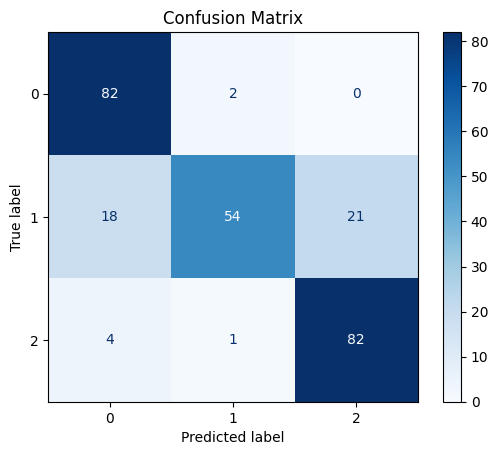

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, Test)
    
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [40]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

accuracy = accuracy_score(y_test, Test)
Recall = recall_score(y_test, Test, average="macro")